In [ ]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install pandas matplotlib

In [2]:
import sqlite3, random
import pandas as pd
import xml.dom.minidom as xd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [3]:
conn = sqlite3.connect('../data/soccer/database.sqlite')

In [4]:
df = pd.read_sql_query('''SELECT Match.date, Match.league_id,
                                    AwayTeam.team_long_name AS away_team_name,
                                    AwayTeam.team_short_name AS away_team_abbr,
                                    Match.away_team_goal,
                                    HomeTeam.team_long_name AS home_team_name,
                                    HomeTeam.team_short_name AS home_team_abbr,
                                    Match.home_team_goal,
                                    Match.home_player_X1, Match.home_player_Y1,
                                    Match.home_player_X2, Match.home_player_Y2,
                                    Match.home_player_X3, Match.home_player_Y3,
                                    Match.home_player_X4, Match.home_player_Y4,
                                    Match.home_player_X5, Match.home_player_Y5,
                                    Match.home_player_X6, Match.home_player_Y6,
                                    Match.home_player_X7, Match.home_player_Y7,
                                    Match.home_player_X8, Match.home_player_Y8,
                                    Match.home_player_X9, Match.home_player_Y9,
                                    Match.home_player_X10, Match.home_player_Y10,
                                    Match.home_player_X11, Match.home_player_Y11,
                                    Match.away_player_X1, Match.away_player_Y1,
                                    Match.away_player_X2, Match.away_player_Y2,
                                    Match.away_player_X3, Match.away_player_Y3,
                                    Match.away_player_X4, Match.away_player_Y4,
                                    Match.away_player_X5, Match.away_player_Y5,
                                    Match.away_player_X6, Match.away_player_Y6,
                                    Match.away_player_X7, Match.away_player_Y7,
                                    Match.away_player_X8, Match.away_player_Y8,
                                    Match.away_player_X9, Match.away_player_Y9,
                                    Match.away_player_X10, Match.away_player_Y10,
                                    Match.away_player_X11, Match.away_player_Y11,
                                    HomePlayer1.player_name AS home_player_1,
                                    HomePlayer2.player_name AS home_player_2,
                                    HomePlayer3.player_name AS home_player_3,
                                    HomePlayer4.player_name AS home_player_4,
                                    HomePlayer5.player_name AS home_player_5,
                                    HomePlayer6.player_name AS home_player_6,
                                    HomePlayer7.player_name AS home_player_7,
                                    HomePlayer8.player_name AS home_player_8,
                                    HomePlayer9.player_name AS home_player_9,
                                    HomePlayer10.player_name AS home_player_10,
                                    HomePlayer11.player_name AS home_player_11,
                                    AwayPlayer1.player_name AS away_player_1,
                                    AwayPlayer2.player_name AS away_player_2,
                                    AwayPlayer3.player_name AS away_player_3,
                                    AwayPlayer4.player_name AS away_player_4,
                                    AwayPlayer5.player_name AS away_player_5,
                                    AwayPlayer6.player_name AS away_player_6,
                                    AwayPlayer7.player_name AS away_player_7,
                                    AwayPlayer8.player_name AS away_player_8,
                                    AwayPlayer9.player_name AS away_player_9,
                                    AwayPlayer10.player_name AS away_player_10,
                                    AwayPlayer11.player_name AS away_player_11
                        FROM Match
                        JOIN Team AwayTeam ON AwayTeam.team_api_id = Match.away_team_api_id
                        JOIN Team HomeTeam ON HomeTeam.team_api_id = Match.home_team_api_id
                        JOIN League ON League.country_id = Match.league_id AND League.name = "England Premier League"
                        JOIN Player HomePlayer1 ON HomePlayer1.player_api_id = Match.home_player_1
                        JOIN Player HomePlayer2 ON HomePlayer2.player_api_id = Match.home_player_2
                        JOIN Player HomePlayer3 ON HomePlayer3.player_api_id = Match.home_player_3
                        JOIN Player HomePlayer4 ON HomePlayer4.player_api_id = Match.home_player_4
                        JOIN Player HomePlayer5 ON HomePlayer5.player_api_id = Match.home_player_5
                        JOIN Player HomePlayer6 ON HomePlayer6.player_api_id = Match.home_player_6
                        JOIN Player HomePlayer7 ON HomePlayer7.player_api_id = Match.home_player_7
                        JOIN Player HomePlayer8 ON HomePlayer8.player_api_id = Match.home_player_8
                        JOIN Player HomePlayer9 ON HomePlayer9.player_api_id = Match.home_player_9
                        JOIN Player HomePlayer10 ON HomePlayer10.player_api_id = Match.home_player_10
                        JOIN Player HomePlayer11 ON HomePlayer11.player_api_id = Match.home_player_11
                        JOIN Player AwayPlayer1 ON AwayPlayer1.player_api_id = Match.away_player_1
                        JOIN Player AwayPlayer2 ON AwayPlayer2.player_api_id = Match.away_player_2
                        JOIN Player AwayPlayer3 ON AwayPlayer3.player_api_id = Match.away_player_3
                        JOIN Player AwayPlayer4 ON AwayPlayer4.player_api_id = Match.away_player_4
                        JOIN Player AwayPlayer5 ON AwayPlayer5.player_api_id = Match.away_player_5
                        JOIN Player AwayPlayer6 ON AwayPlayer6.player_api_id = Match.away_player_6
                        JOIN Player AwayPlayer7 ON AwayPlayer7.player_api_id = Match.away_player_7
                        JOIN Player AwayPlayer8 ON AwayPlayer8.player_api_id = Match.away_player_8
                        JOIN Player AwayPlayer9 ON AwayPlayer9.player_api_id = Match.away_player_9
                        JOIN Player AwayPlayer10 ON AwayPlayer10.player_api_id = Match.away_player_10
                        JOIN Player AwayPlayer11 ON AwayPlayer11.player_api_id = Match.away_player_11''', conn)

In [ ]:
pd.set_option('display.max_columns', None)
# df2 = pd.read_sql_query('select * from Match join League on League.country_id = Match.league_id and League.name = "England Premier League"', conn)
df2 = pd.read_sql_query('select * from Player', conn)
df2

In [ ]:
df

2014-11-01, Chelsea (home) vs. Queens Park Rangers (away)
CHE 2 : 1 QPR


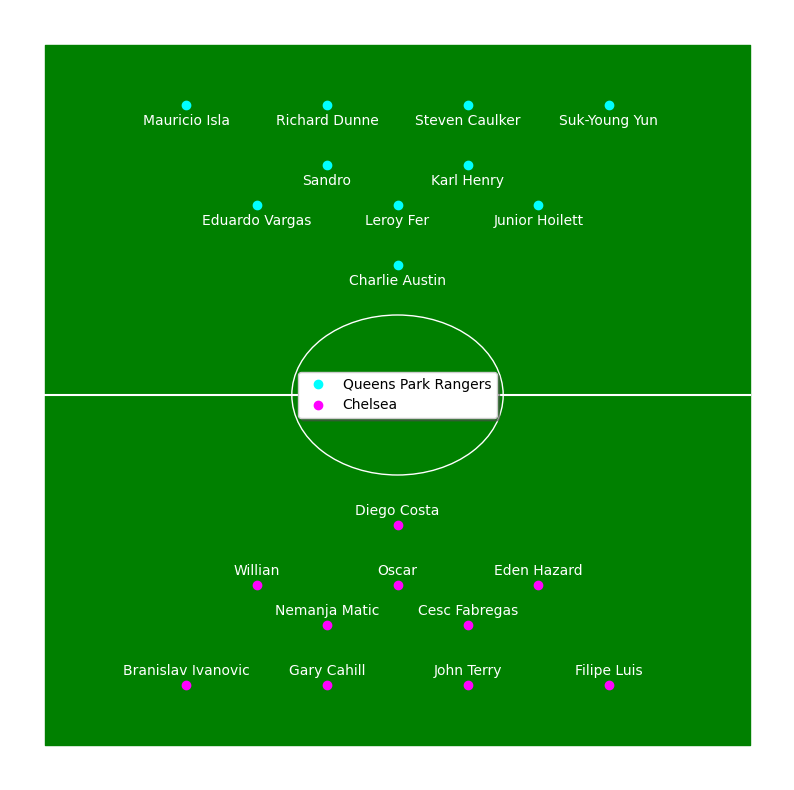

In [14]:
match_id = random.randint(0, 3039)
show_summary(df, match_id)
show_formations(df, match_id)

In [6]:
def show_summary(df, match_id):
    match = df.iloc[match_id]
    print(f'{match['date'].split(' ')[0]}', end=', ')
    print(f'{match['home_team_name']} (home) vs. {match['away_team_name']} (away)')
    print(f'{match['home_team_abbr']} {match['home_team_goal']} : {match['away_team_goal']} {match['away_team_abbr']}')

In [7]:
def show_formations(df, match_id):
    match = df.iloc[match_id]
    plt.figure(figsize=(10, 10))
    
    x = []
    y = []
    
    for i in range(2, 12):
        x.append(match[f'away_player_X{i}'])
        y.append(35 - match[f'away_player_Y{i}'])
        plt.annotate(match[f'away_player_{i}'], (x[-1], y[-1] - 1), ha='center', color='w')
    
    plt.plot(x, y, 'o', color='cyan')
        
    x = []
    y = []
    
    for i in range(2, 12):
        x.append(match[f'home_player_X{i}'])
        y.append(match[f'home_player_Y{i}'])
        plt.annotate(match[f'home_player_{i}'], (x[-1], y[-1] + 0.5), ha='center', color='w')
    
    plt.plot(x, y, 'o', color='magenta')
    plt.legend([match['away_team_name'], match['home_team_name']], loc='center', fancybox=True, shadow=True)
    
    plt.fill_between([0, 10], [0, 0], [35, 35], color='g')
    plt.plot([0, 10], [17.5, 17.5], color='w')
    
    circle = Ellipse((5, 17.5), 3, 8, color='w', fill=False)
    plt.gca().add_patch(circle)

    plt.axis('off')
    plt.show()